# New Section

In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.utils import to_categorical
from keras.datasets import mnist
import warnings
warnings.filterwarnings('ignore')

In [2]:
from tensorflow.keras.losses import CategoricalCrossentropy

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
y_test.shape

(10000,)

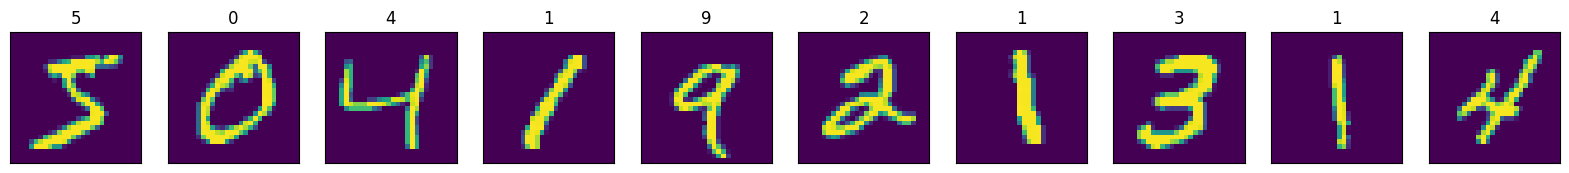

In [5]:
fig, axes=plt.subplots(ncols=10, sharex=False,
                       sharey=True, figsize=(20,4))
for i in range(10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(X_train[i])
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [6]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [14]:
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000, 10)


In [15]:
print(X_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000, 10)


In [8]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 10)                60        
                                                                 
Total params: 7965 (31.11 KB)
Trainable params: 7965 (31.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
import tensorflow as tf

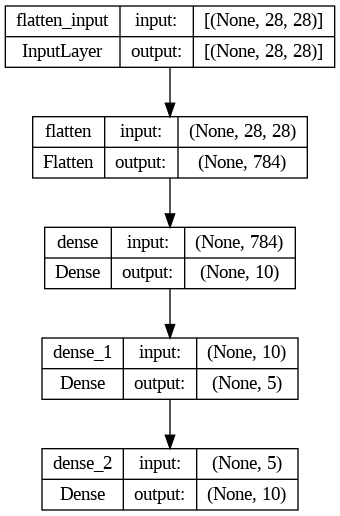

In [11]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [12]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
history = model.fit(X_train, y_train, epochs=20,
          validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 1.7539 - accuracy: 0.4536 - val_loss: 1.3293 - val_accuracy: 0.6151
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1646 - accuracy: 0.6549 - val_loss: 1.0261 - val_accuracy: 0.6880
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.9693 - accuracy: 0.7008 - val_loss: 0.8825 - val_accuracy: 0.7357
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8585 - accuracy: 0.7285 - val_loss: 0.7975 - val_accuracy: 0.7493
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7854 - accuracy: 0.7366 - val_loss: 0.7936 - val_accuracy: 0.7248
Epoch 6/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.7422 - accuracy: 0.7515 - val_loss: 0.7175 - val_accuracy: 0.7484
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7072 - accuracy: 0.7679 - val_loss: 0.6793 - val_accuracy:

In [16]:
model.save('mnist_model.h5')

In [17]:
history.history

{'loss': [1.7539491653442383,
  1.164557695388794,
  0.969309389591217,
  0.858527660369873,
  0.7853851318359375,
  0.7421631217002869,
  0.70719313621521,
  0.6994556188583374,
  0.6635792851448059,
  0.6473156809806824,
  0.6218727231025696,
  0.6345571875572205,
  0.6178593635559082,
  0.5986836552619934,
  0.6001574993133545,
  0.5757392048835754,
  0.581275999546051,
  0.5630264282226562,
  0.5597605109214783,
  0.572580099105835],
 'accuracy': [0.4535999894142151,
  0.6549333333969116,
  0.7008333206176758,
  0.7285166382789612,
  0.7365666627883911,
  0.751466691493988,
  0.7678666710853577,
  0.7677000164985657,
  0.7858833074569702,
  0.7903666496276855,
  0.798633337020874,
  0.7907999753952026,
  0.7940833568572998,
  0.8097166419029236,
  0.8098333477973938,
  0.8248166441917419,
  0.8225666880607605,
  0.8303833603858948,
  0.8343499898910522,
  0.8326333165168762],
 'val_loss': [1.329262137413025,
  1.0260940790176392,
  0.8824895620346069,
  0.7975269556045532,
  0.7936

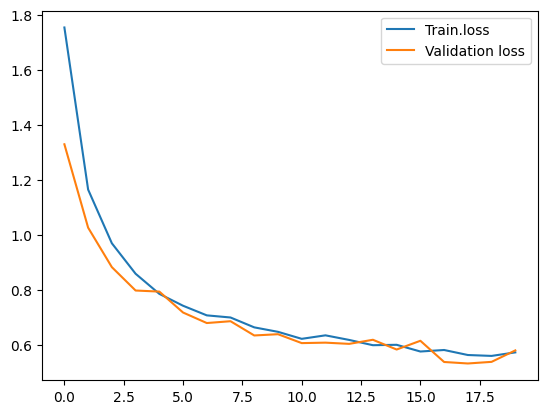

In [18]:
plt.plot(history.history['loss'], label='Train.loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

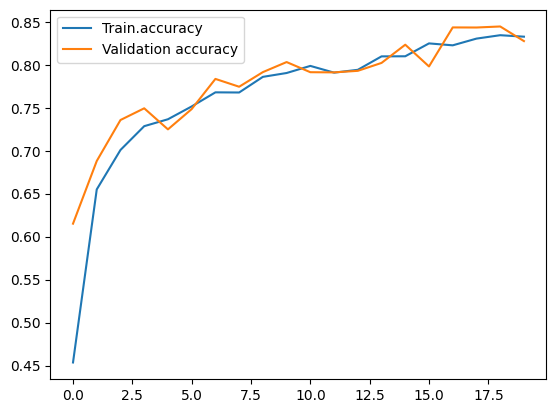

In [19]:
plt.plot(history.history['accuracy'], label='Train.accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend()

In [20]:
model = keras.models.load_model('mnist_model.h5')

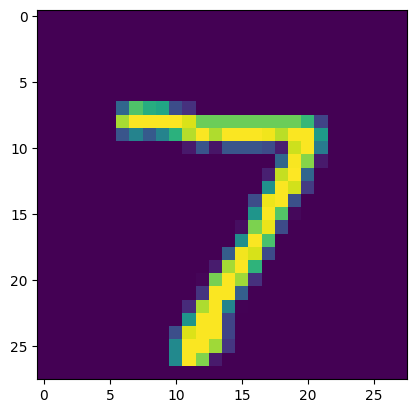

In [22]:
plt.imshow(X_test[0])

In [24]:
x = np.reshape(X_test[0],(1,28,28))
np.argmax(model.predict(x))

1/1 [==============================] - 0s 219ms/step


7

In [25]:
model.predict(x)

1/1 [==============================] - 0s 45ms/step


array([[5.2542170e-04, 4.5470835e-05, 1.6821083e-03, 1.4462183e-02,
        1.9224288e-04, 1.9252967e-03, 1.7899553e-06, 9.6505165e-01,
        4.4323076e-04, 1.5670601e-02]], dtype=float32)